In [57]:
import cv2
import albumentations as A
import numpy as np
from albumentations.core.transforms_interface import ImageOnlyTransform
from math import ceil

In [4]:
def read_annotations(label_file):
    with open(label_file, 'r') as file:
        annotations = []
        for line in file.readlines():
            parts = line.strip().split()
            class_id = int(parts[0])
            center_x = float(parts[1])
            center_y = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])
            annotations.append((class_id, center_x, center_y, width, height))
        return annotations

In [99]:
image_path = "D:\Datasets\Squash_Ball_Dataset\\train\images\\frame_100480_jpg.rf.9570c08365a92361a69026900d538c5d.jpg"
input_label = "D:\Datasets\Squash_Ball_Dataset\\train\labels\\frame_100480_jpg.rf.9570c08365a92361a69026900d538c5d.txt"
image_width = 640
image_height = 640

In [100]:
annotations = read_annotations(input_label)
annotations

[(0, 0.8328125, 0.76171875, 0.02109375, 0.03828125)]

In [101]:
def convert_annotations_to_pixels(annotations, image_width, image_height):
    pixel_annotations = []
    for annotation in annotations:
        class_id, center_x, center_y, width, height = annotation
        center_x = int(ceil(center_x * image_width))
        center_y = int(ceil(center_y * image_height))
        x_min = int(ceil(center_x - width / 2))
        y_min = int(ceil(center_y - height / 2))
        x_max = int(ceil(center_x + width / 2))
        y_max = int(ceil(center_y + height / 2))
        pixel_annotations.append((class_id, x_min, y_min, x_max, y_max))
    return pixel_annotations

In [102]:
pixel_annotations = convert_annotations_to_pixels(annotations, image_width, image_height)
pixel_annotations = pixel_annotations[0]
pixel_annotations

(0, 533, 488, 534, 489)

In [103]:
clas, x_min, y_min, x_max, y_max = pixel_annotations
x_min, x_max, y_min, y_max

(533, 534, 488, 489)

In [104]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image

array([[[  2,   2,   2],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   1,   0],
        [  6,   2,   1],
        [  6,   2,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  3,   0,   0],
        [  4,   0,   0],
        [  3,   0,   0]],

       [[166, 166, 166],
        [160, 160, 160],
        [157, 157, 157],
        ...,
        [155, 149, 149],
        [158, 149, 150],
        [156, 150, 150]],

       ...,

       [[111, 111,  99],
        [108, 108,  96],
        [106, 106,  94],
        ...,
        [158, 146, 132],
        [151, 139, 125],
        [148, 136, 122]],

       [[  1,   3,   0],
        [  0,   2,   0],
        [  0,   2,   0],
        ...,
        [  6,   0,   0],
        [  6,   0,   0],
        [  6,   0,   0]],

       [[  2,   4,   0],
        [  1,   3,   0],
        [  0,   2,   0],
        ...,
        [  3,   0,   0],
        [  3,   0,   0],
        [ 12,   9,   4]]

In [236]:
ball_region = image[y_min:y_max, x_min:x_max]
# transform = A.Compose([
#             A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=1),
#             A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=1)
#         ])
# transform = A.Compose([
#     A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.7),
#     A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=15, val_shift_limit=10, p=0.7),
#     A.RGBShift(r_shift_limit=10, g_shift_limit=10, b_shift_limit=10, p=0.7),
#     # A.GaussianBlur(blur_limit=(3, 7), p=0.7),
#     A.ChannelShuffle(p=0.7),
#     A.ToGray(p=0.5),
#     A.RandomGamma(gamma_limit=(80, 120), p=0.7),
# ])
# transform = A.Compose([
#     A.RandomBrightnessContrast(brightness_limit=(-0.3,0.3), contrast_limit=(-0.3, 0), p=1),
#     A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.7),
#     A.RGBShift(r_shift_limit=10, g_shift_limit=10, b_shift_limit=10, p=0.7),
#     A.ChannelShuffle(p=0.5),
#     A.RandomGamma(gamma_limit=(80, 120), p=0.7),
#     A.GaussNoise(var_limit=(10.0, 50.0), p=0.5),  # Add Gaussian noise to increase texture
#     # A.Blur(blur_limit=(3, 7), p=0.3),             # Blur the image slightly
#     A.CLAHE(clip_limit=4.0, tile_grid_size=(8, 8), p=0.3),  # CLAHE for contrast enhancement
# ])
transform = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.0), contrast_limit=-0.5, p=1),
    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=0, p=1),
    A.RGBShift(r_shift_limit=10, g_shift_limit=10, b_shift_limit=10, p=0.7),
    A.ChannelShuffle(p=0.5),
    A.RandomGamma(gamma_limit=(80, 120), p=0.7),
    A.CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=0.3),
    A.ToGray(p=0.3),

])
transformed = transform(image = image)
transformed_image = transformed["image"]
# image[y_min:y_max, x_min:x_max] = transformed_image
cv2.imshow('Augmented Image', cv2.cvtColor(transformed_image, cv2.COLOR_RGB2BGR))
cv2.waitKey(0)
cv2.destroyAllWindows()

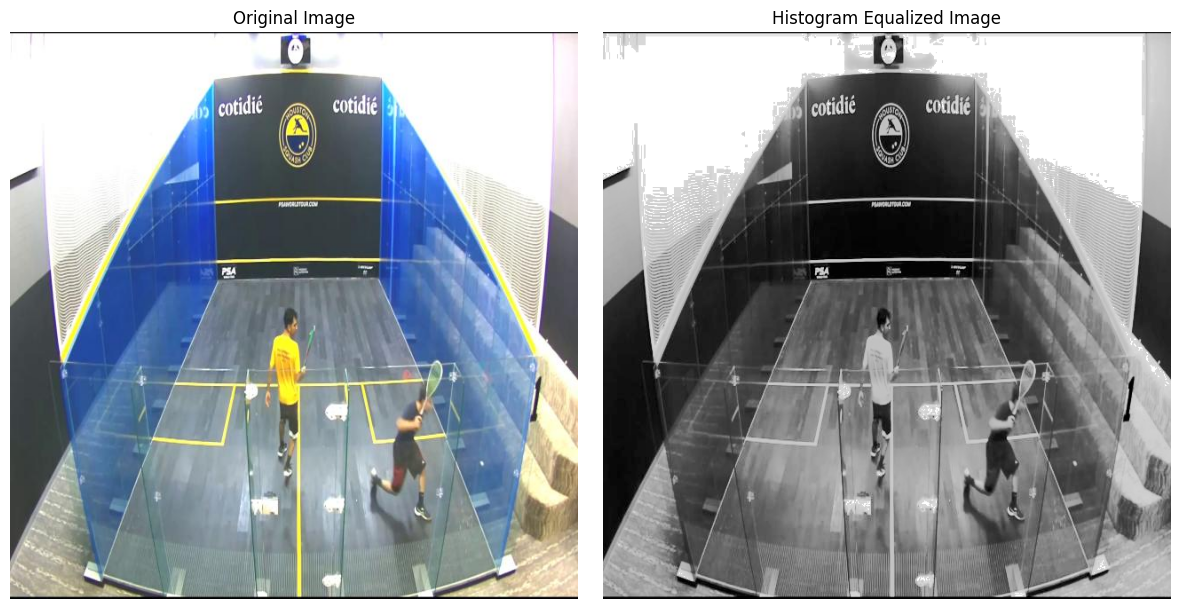

In [195]:
import cv2
import matplotlib.pyplot as plt

# Example image (replace with your actual image)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))

# Convert back to RGB for display
equalized_image_rgb = cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2RGB)

# Display original and equalized images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(equalized_image_rgb)
axes[1].set_title('Histogram Equalized Image')
axes[1].axis('off')
plt.tight_layout()
plt.show()
